## COMP5721M: Programming for Data Science 

## Group project (Coursework 2): Data Analysis Project


# _Analysis of Wine Market Characteristics and Pricing Patterns_


Project participants:

* Yike Xiao, fszt6675@leeds.ac.uk
* Yihao Zhang, srth4846@leeds.ac.uk
* Wei Qing lee, xrsb4656@leeds.ac.uk
* Yuhao Wu, jscw7310@leeds.ac.uk

# Project Plan

## The Data 

The dataset for this analysis project was sourced from Kaggle. It comprises a comprehensive collection of wine-related information, encompassing multiple essential attributes that characterize both the product specifications and market positioning of various wines. 

The dataset contains several key categorical and numerical variables that provide rich insights into wine products:

Product Identification
- Title and Description fields provide basic product information
- Vintage information indicating production years
- Type and Style categories defining wine classifications
- Country and Region data offering geographical context
- Appellation information for wine origin certification

Technical Wine Characteristics
- Grape varieties (primary and secondary) indicating wine composition
- ABV (Alcohol By Volume) percentages
- Closure type provides packaging information

Commercial Attributes
- Price information
- Per bottle/case/each categorization for different sales units
- Characteristics descriptions for wine properties

This dataset provides a comprehensive view of the global wine market, covering a wide range of wine types, origins, and price points. The data appears to be well-structured, with clear and consistent labeling of the features. Based on a preliminary review, the data seems to be accurate and reliable, with no obvious signs of missing values or inconsistencies.

One potential limitation of the dataset is that it may not capture the most recent wine releases, as the dataset was last updated in 2017. However, the wealth of historical data should still provide valuable insights into the factors that influence wine quality, pricing, and consumer preferences.

Overall, this wine dataset offers a rich source of information that can be leveraged to address a variety of research questions and business challenges related to the wine industry. Its comprehensive coverage of wine attributes and the large number of data points make it a suitable choice for my data analysis project.

## Project Aim and Objectives 
The general aim of this project is to understand the key factors that influence wine pricing in the market, while also exploring geographical impacts and consumer preferences.  The project will focus on both correlation analysis and visualization techniques to uncover hidden patterns in the wine market data, while also implementing classification methods to categorize wines based on their characteristics.

### Specific Objective(s)
- Objective 1: Identify factors affecting wine pricing through exploratory data analysis.

- Objective 2: Investigate regional wine production patterns.

- Objective 3: Examine the impact of vintage (year) on wine pricing, creating a trend analysis to understand how age affects price points across different wine categories.

- Objective 4:  Classify Wines into Quality or Price Categories.

## System Design

### Architecture


### Processing Modules and Algorithms


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_csv("C:\\Users\\Admin\\Documents\\Leeds\\COMP5712\\data\\WineDataset.csv")

In [3]:
wine_df.head(10)

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley
5,Louis Roederer 'Cristal' Champagne 2015,Cristal is Louis Roederer’s flagship wine. It ...,£300.00 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,9.0,NaN,per bottle,White,ABV 12.00%,NaN,NaN,2015,NaN
6,"La Gioiosa Prosecco DOC, Treviso","In Treviso, Prosecco’s heartland, the locals h...",£12.99 per bottle,75CL,Glera,NaN,Natural Cork,Italy,8.3,"Green Apple, Citrus Fruit, Floral",per bottle,White,ABV 11.00%,Prosecco Doc,Light & Refreshing,NV,NaN
7,The Macallan Sherry Oak 12 Year Old Single Mal...,The Macallan’s rich heritage dates back to 182...,£80.00 per bottle,70CL,NaN,NaN,Natural Cork,Scotland,28.0,NaN,per bottle,Brown,ABV 40.00%,NaN,NaN,NV,NaN
8,Bouvet Ladubay Saumur Brut,The Loire Valley’s Saumur Brut is the go-to ap...,£13.99 per bottle,75CL,Chenin Blanc,NaN,Natural Cork,France,9.4,"Honeysuckle, Citrus Fruit",per bottle,White,ABV 12.50%,Loire,Rich & Toasty,NV,Saumur
9,"LB7 Red 2020/21, Lisbon",Portuguese red blends are a Majestic specialit...,£8.99 per bottle,75CL,Castelão,"Touriga Nacional, Tinta Roriz",Natural Cork,Portugal,10.1,"Spice, Black Fruit, Black Plum, Blackberry",per bottle,Red,ABV 13.50%,Lisboa,Rich & Juicy,2021,NaN


In [4]:
wine_df.shape

(1290, 17)

In [5]:
wine_df.columns

Index(['Title', 'Description', 'Price', 'Capacity', 'Grape',
       'Secondary Grape Varieties', 'Closure', 'Country', 'Unit',
       'Characteristics', 'Per bottle / case / each', 'Type', 'ABV', 'Region',
       'Style', 'Vintage', 'Appellation'],
      dtype='object')

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1290 non-null   object 
 1   Description                1286 non-null   object 
 2   Price                      1290 non-null   object 
 3   Capacity                   1290 non-null   object 
 4   Grape                      1275 non-null   object 
 5   Secondary Grape Varieties  488 non-null    object 
 6   Closure                    1279 non-null   object 
 7   Country                    1284 non-null   object 
 8   Unit                       1281 non-null   float64
 9   Characteristics            1253 non-null   object 
 10  Per bottle / case / each   1290 non-null   object 
 11  Type                       1285 non-null   object 
 12  ABV                        1281 non-null   object 
 13  Region                     1124 non-null   objec

In [7]:
wine_clean = wine_df.copy()

In [8]:
wine_clean.drop(['Description','Secondary Grape Varieties', 'Appellation'],axis=1, inplace = True)

In [9]:
wine_clean

,Title,Price,Capacity,Grape,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage
0,"The Guv'nor, Spain",£9.99 per bottle,75CL,Tempranillo,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV
1,Bread & Butter 'Winemaker's Selection' Chardon...,£15.99 per bottle,75CL,Chardonnay,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",£12.49 per bottle,75CL,Sauvignon Blanc,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022
3,Louis Latour Mâcon-Lugny 2021/22,£17.99 per bottle,75CL,Chardonnay,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022
4,Bread & Butter 'Winemaker's Selection' Pinot N...,£15.99 per bottle,75CL,Pinot Noir,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",£11.99 per bottle,75CL,Chenin Blanc,Natural Cork,France,9.4,"Quince, Green Apple, Lemon, Pear",per bottle,White,ABV 12.50%,Loire,Aromatic & Floral,2021
1286,"Waimea Estates Pinot Noir Rosé 2021, Nelson",£13.99 per bottle,75CL,Pinot Noir,Screwcap,New Zealand,9.8,"Floral, Raspberry, Red Cherry, Strawberry",per bottle,Rosé,ABV 13.00%,Nelson,Delicate & Dry,2021
1287,Wakefield 'Visionary' Cabernet Sauvignon 2010,£85.00 per bottle,75CL,Cabernet Sauvignon,Screwcap,Australia,10.1,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",per bottle,Red,ABV 13.50%,South Australia,Savoury & Full Bodied,2010
1288,Yalumba 'The Menzies' Cabernet Sauvignon 2015/...,£37.99 per bottle,75CL,Cabernet Sauvignon,Natural Cork,Australia,10.9,"Black Plum, Blackcurrant, Vanilla",per bottle,Red,ABV 14.50%,South Australia,Savoury & Full Bodied,2016


In [10]:
wine_clean.isnull().sum()

Title                         0
Price                         0
Capacity                      0
Grape                        15
Closure                      11
Country                       6
Unit                          9
Characteristics              37
Per bottle / case / each      0
Type                          5
ABV                           9
Region                      166
Style                        78
Vintage                       7
dtype: int64

In [11]:
# Handle missing values for categorical columns
categorical_cols = ['Grape', 'Closure', 'Country', 'Characteristics', 'Type', 'Region', 
                   'Style']

for col in categorical_cols:
    wine_clean[col] = wine_clean[col].fillna('Unknown')


In [12]:
wine_clean.isnull().sum()

Title                       0
Price                       0
Capacity                    0
Grape                       0
Closure                     0
Country                     0
Unit                        9
Characteristics             0
Per bottle / case / each    0
Type                        0
ABV                         9
Region                      0
Style                       0
Vintage                     7
dtype: int64

In [13]:
# Clean Price column
# the original price values
wine_clean['Price'].unique()

array(['£9.99 per bottle', '£15.99 per bottle', '£12.49 per bottle',
       '£17.99 per bottle', '£300.00 per bottle', '£12.99 per bottle',
       '£80.00 per bottle', '£13.99 per bottle', '£8.99 per bottle',
       '£11.99 per bottle', '£46.99 per bottle', '£11.29 per bottle',
       '£22.99 per bottle', '£45.99 per bottle', '£49.99 per bottle',
       '£33.99 per bottle', '£23.99 per bottle', '£21.99 per bottle',
       '£42.99 per bottle', '£29.99 per bottle', '£39.99 per bottle',
       '£14.99 per bottle', '£16.99 per bottle', '£7.99 per bottle',
       '£18.99 per bottle', '£19.99 per bottle', '£10.99 per bottle',
       '£34.99 per bottle', '£43.99 per bottle', '£24.99 per bottle',
       '£35.99 per bottle', '£37.99 per bottle', '£99.99 per bottle',
       '£75.99 per bottle', '£79.00 per case', '£61.99 per bottle',
       '£57.99 per bottle', '£20.99 per bottle', '£44.99 per bottle',
       '£36.99 per bottle', '£69.99 per bottle', '£25.99 per bottle',
       '£6.99 per bottle

In [14]:
def clean_price(price):
    return float(price.replace('£', '').replace(' per bottle', '').replace(' per case', '').replace(' each', ''))

wine_clean['Price'] = wine_clean['Price'].apply(clean_price)

In [15]:
wine_clean['Price'].dtype

dtype('float64')

In [16]:
wine_clean['Capacity'].unique()

array(['75CL', '70CL', '750ML', '1.5LTR', 'Our', '37.5CL', '2.25L',
       '500ML', '50CL', '150CL', '300CL', '5LITRE', '375ML'], dtype=object)

In [17]:
def convert_to_ml(value):
    # Remove whitespace and convert to uppercase for consistency
    value = value.strip().upper()

    # Handle each unit by identifying and converting it to milliliters
    if 'ML' in value:
        return int(float(value.replace('ML', '')))
    elif 'CL' in value:
        return int(float(value.replace('CL', '')) * 10)  # 1 CL = 10 ML
    elif any(unit in value for unit in ['LITRE', 'LTR', 'L']):
        return int(float(value.replace('LITRE', '').replace('LTR', '').replace('L', '')) * 1000)  # 1 Litre = 1000 ML
    else:
        return None # Handle unexpected values, like 'Our'

# Apply the function to the 'Capacity' column
wine_clean['Capacity'] = wine_clean['Capacity'].apply(convert_to_ml)

In [18]:
wine_clean['Capacity'].dtype

dtype('float64')

In [19]:
wine_clean['ABV'].unique()

array(['ABV 14.00%', 'ABV 13.50%', 'ABV 13.00%', 'ABV 12.00%',
       'ABV 11.00%', 'ABV 40.00%', 'ABV 12.50%', 'ABV 14.40%',
       'ABV 14.50%', 'ABV 14.20%', 'ABV 11.50%', 'ABV 15.00%', nan,
       'ABV 15.50%', 'ABV 12.90%', 'ABV 10.50%', 'ABV 8.00%', 'ABV 9.50%',
       'ABV 13.10%', 'ABV 0.50%', 'ABV 20.00%', 'ABV 20.50%',
       'ABV 18.00%', 'ABV 16.00%', 'ABV 10.00%', 'ABV 8.50%',
       'ABV 17.50%', 'ABV 17.00%', 'ABV 18.50%', 'ABV 13.80%',
       'ABV 5.00%', 'ABV 4.90%', 'ABV 19.00%', 'ABV 14.60%'], dtype=object)

In [20]:
def clean_abv(value):
    if isinstance(value, str):
        return float(value.replace('ABV ', '').replace('%', ''))
    return float(value)

wine_clean['ABV'] = wine_clean['ABV'].apply(clean_abv)

In [21]:
wine_clean['ABV'].dtype

dtype('float64')

In [22]:
wine_clean

,Title,Price,Capacity,Grape,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage
0,"The Guv'nor, Spain",9.99,750.0,Tempranillo,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,14.0,Unknown,Rich & Juicy,NV
1,Bread & Butter 'Winemaker's Selection' Chardon...,15.99,750.0,Chardonnay,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,13.5,California,Rich & Toasty,2021
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",12.49,750.0,Sauvignon Blanc,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,13.0,Marlborough,Crisp & Zesty,2022
3,Louis Latour Mâcon-Lugny 2021/22,17.99,750.0,Chardonnay,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,13.5,Burgundy,Ripe & Rounded,2022
4,Bread & Butter 'Winemaker's Selection' Pinot N...,15.99,750.0,Pinot Noir,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,13.5,California,Smooth & Mellow,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",11.99,750.0,Chenin Blanc,Natural Cork,France,9.4,"Quince, Green Apple, Lemon, Pear",per bottle,White,12.5,Loire,Aromatic & Floral,2021
1286,"Waimea Estates Pinot Noir Rosé 2021, Nelson",13.99,750.0,Pinot Noir,Screwcap,New Zealand,9.8,"Floral, Raspberry, Red Cherry, Strawberry",per bottle,Rosé,13.0,Nelson,Delicate & Dry,2021
1287,Wakefield 'Visionary' Cabernet Sauvignon 2010,85.00,750.0,Cabernet Sauvignon,Screwcap,Australia,10.1,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",per bottle,Red,13.5,South Australia,Savoury & Full Bodied,2010
1288,Yalumba 'The Menzies' Cabernet Sauvignon 2015/...,37.99,750.0,Cabernet Sauvignon,Natural Cork,Australia,10.9,"Black Plum, Blackcurrant, Vanilla",per bottle,Red,14.5,South Australia,Savoury & Full Bodied,2016


In [23]:
wine_clean.isnull().sum()

Title                       0
Price                       0
Capacity                    6
Grape                       0
Closure                     0
Country                     0
Unit                        9
Characteristics             0
Per bottle / case / each    0
Type                        0
ABV                         9
Region                      0
Style                       0
Vintage                     7
dtype: int64

In [24]:
# List of columns with null values
null_columns = ['Capacity', 'ABV', 'Vintage', 'Unit']

# Create a mask for rows where any of these columns are null
null_mask = wine_clean[null_columns].isnull().any(axis=1)

# If you want to see other columns for these rows as well, you can do:
print("\nDetails of numerical rows with null values:")
wine_clean[null_mask]


Details of numerical rows with null values:


,Title,Price,Capacity,Grape,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage
104,Rosé Classics 6 Bottle Wine Case,79.00,NaN,Unknown,Unknown,Unknown,NaN,Unknown,per case,Rosé,NaN,Unknown,Unknown,NaN
224,Freixenet 0.0% Alcohol Free Sparkling Rosé,6.99,750.0,Airen,Natural Cork,Spain,NaN,"Citrus Fruit, Raspberry, Strawberry",per bottle,Rosé,NaN,Unknown,Light & Refreshing,NV
295,The Guv'nor VIP 6 Bottle Taster Case,49.00,NaN,Unknown,Unknown,Unknown,NaN,Unknown,per case,Red,NaN,Unknown,Unknown,NaN
298,The Guv'nor VIP 6 Bottle Wine Case,59.94,NaN,Unknown,Unknown,Unknown,NaN,Unknown,per case,Red,NaN,Unknown,Unknown,NaN
371,Noughty Organic Sparkling Chardonnay 0%,9.99,750.0,Chardonnay,Natural Cork,Germany,NaN,"Citrus Fruit, Floral",per bottle,White,NaN,Unknown,Light & Refreshing,NV
379,Freixenet 0.0% Alcohol Free Sparkling,6.99,750.0,Airen,Natural Cork,Spain,NaN,"Citrus Fruit, Green Apple, Lemon",per bottle,White,NaN,Unknown,Light & Refreshing,NV
422,Festive French Classics 12 Bottle Mixed Wine Case,120.00,NaN,Unknown,Unknown,Unknown,NaN,Unknown,per case,Mixed,NaN,Unknown,Unknown,NaN
458,Majestic Classics 12 Red Wine Case,90.00,NaN,Unknown,Unknown,Unknown,NaN,Unknown,per case,Red,NaN,Unknown,Unknown,NaN
460,The Guv'nor Red 6 Bottle Wine Case,44.94,NaN,Unknown,Unknown,Unknown,NaN,Unknown,per case,Red,NaN,Unknown,Unknown,NaN
960,Paulaner Münchner Hell 5L Keg,20.00,5000.0,Unknown,Unknown,Germany,24.5,Unknown,each,Unknown,4.9,Unknown,Unknown,NaN


In [25]:
# Identify rows where the title contains "0.0%" or "0%" and ABV is NaN
mask = (
    wine_clean['Title'].str.contains(r"0\.?0?%", case=False, na=False) &  # Matches "0.0%" or "0%"
    wine_clean['ABV'].isnull()  # ABV must be NaN
)

# Update the ABV to 0.0 for these rows
wine_clean.loc[mask, 'ABV'] = 0.0
wine_clean.loc[mask, 'Unit'] = 0.0

In [26]:
wine_clean.loc[mask]

,Title,Price,Capacity,Grape,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage
224,Freixenet 0.0% Alcohol Free Sparkling Rosé,6.99,750.0,Airen,Natural Cork,Spain,0.0,"Citrus Fruit, Raspberry, Strawberry",per bottle,Rosé,0.0,Unknown,Light & Refreshing,NV
371,Noughty Organic Sparkling Chardonnay 0%,9.99,750.0,Chardonnay,Natural Cork,Germany,0.0,"Citrus Fruit, Floral",per bottle,White,0.0,Unknown,Light & Refreshing,NV
379,Freixenet 0.0% Alcohol Free Sparkling,6.99,750.0,Airen,Natural Cork,Spain,0.0,"Citrus Fruit, Green Apple, Lemon",per bottle,White,0.0,Unknown,Light & Refreshing,NV


In [28]:
wine_clean.isnull().sum()

Title                       0
Price                       0
Capacity                    6
Grape                       0
Closure                     0
Country                     0
Unit                        6
Characteristics             0
Per bottle / case / each    0
Type                        0
ABV                         6
Region                      0
Style                       0
Vintage                     7
dtype: int64

In [29]:
wine_clean = wine_clean.dropna()

In [31]:
wine_clean.shape

(1283, 14)

In [27]:
print("Number of duplicate entries:", wine_clean.duplicated().sum())

Number of duplicate entries: 0


In [33]:
wine_clean['Characteristic Count'] = wine_clean['Characteristics'].str.count(',') + 1

C:\Users\Admin\AppData\Local\Temp\ipykernel_9556\764144650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_clean['Characteristic Count'] = wine_clean['Characteristics'].str.count(',') + 1


In [34]:
wine_clean

,Title,Price,Capacity,Grape,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Characteristic Count
0,"The Guv'nor, Spain",9.99,750.0,Tempranillo,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,14.0,Unknown,Rich & Juicy,NV,3
1,Bread & Butter 'Winemaker's Selection' Chardon...,15.99,750.0,Chardonnay,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,13.5,California,Rich & Toasty,2021,7
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",12.49,750.0,Sauvignon Blanc,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,13.0,Marlborough,Crisp & Zesty,2022,7
3,Louis Latour Mâcon-Lugny 2021/22,17.99,750.0,Chardonnay,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,13.5,Burgundy,Ripe & Rounded,2022,4
4,Bread & Butter 'Winemaker's Selection' Pinot N...,15.99,750.0,Pinot Noir,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,13.5,California,Smooth & Mellow,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",11.99,750.0,Chenin Blanc,Natural Cork,France,9.4,"Quince, Green Apple, Lemon, Pear",per bottle,White,12.5,Loire,Aromatic & Floral,2021,4
1286,"Waimea Estates Pinot Noir Rosé 2021, Nelson",13.99,750.0,Pinot Noir,Screwcap,New Zealand,9.8,"Floral, Raspberry, Red Cherry, Strawberry",per bottle,Rosé,13.0,Nelson,Delicate & Dry,2021,4
1287,Wakefield 'Visionary' Cabernet Sauvignon 2010,85.00,750.0,Cabernet Sauvignon,Screwcap,Australia,10.1,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",per bottle,Red,13.5,South Australia,Savoury & Full Bodied,2010,8
1288,Yalumba 'The Menzies' Cabernet Sauvignon 2015/...,37.99,750.0,Cabernet Sauvignon,Natural Cork,Australia,10.9,"Black Plum, Blackcurrant, Vanilla",per bottle,Red,14.5,South Australia,Savoury & Full Bodied,2016,3


In [35]:
all_characteristics = set(char.strip() for chars in wine_clean['Characteristics'].str.split(',') for char in chars)
print("There are " + str(len(all_characteristics)) + " different charateristics.")
all_characteristics

There are 113 different charateristics.


{'Almond',
 'Apricot',
 'Asparagus',
 'Banana',
 'Biscuit',
 'Black Cherry',
 'Black Fruit',
 'Black Pepper',
 'Black Plum',
 'Blackberry',
 'Blackcurrant',
 'Blackcurrant Leaf',
 'Blossom',
 'Blueberry',
 'Bread',
 'Bread Dough',
 'Butter',
 'Candied Fruit',
 'Caramel',
 'Cassis',
 'Cedar',
 'Charred Wood',
 'Chocolate',
 'Cigar Box',
 'Cinnamon',
 'Citrus Fruit',
 'Cloves',
 'Cocoa',
 'Coconut',
 'Coffee',
 'Cooked Fruit',
 'Cranberry',
 'Cream',
 'Damson',
 'Date',
 'Dried Fruit',
 'Dried Herbs',
 'Earth',
 'Elderflower',
 'Eucalyptus',
 'Fennel',
 'Fig',
 'Flint',
 'Floral',
 'Forest Floor',
 'Game',
 'Ginger',
 'Gooseberry',
 'Grape',
 'Grapefruit',
 'Grass',
 'Green Apple',
 'Green Bell Pepper',
 'Green Fruit',
 'Hazelnut',
 'Herbaceous',
 'Herbal',
 'Honey',
 'Honeysuckle',
 'Jammy',
 'Leather',
 'Lemon',
 'Lime',
 'Liquorice',
 'Lychee',
 'Mango',
 'Melon',
 'Mineral',
 'Mint',
 'Mushroom',
 'Nectarine',
 'Nutmeg',
 'Orange',
 'Orange Marmalade',
 'Passionfruit',
 'Pastry',
 'P

In [36]:
# Summary statistics for numeric columns
wine_clean.describe()

,Price,Capacity,Unit,ABV,Characteristic Count
count,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000
mean,28.380873,764.107560,10.142712,13.395401,4.089634
std,35.460156,163.306449,2.334490,1.923194,1.513510
min,4.990000,375.000000,0.000000,0.000000,1.000000
25%,12.990000,750.000000,9.400000,12.500000,3.000000
50%,16.990000,750.000000,10.100000,13.500000,4.000000
75%,29.990000,750.000000,10.500000,14.000000,5.000000
max,430.000000,3000.000000,39.000000,40.000000,10.000000


In [37]:
# Frequency counts for categorical columns
wine_clean['Type'].value_counts()

White      584
Red        565
Rosé       123
Unknown      4
Tawny        4
Orange       2
Brown        1
Name: Type, dtype: int64

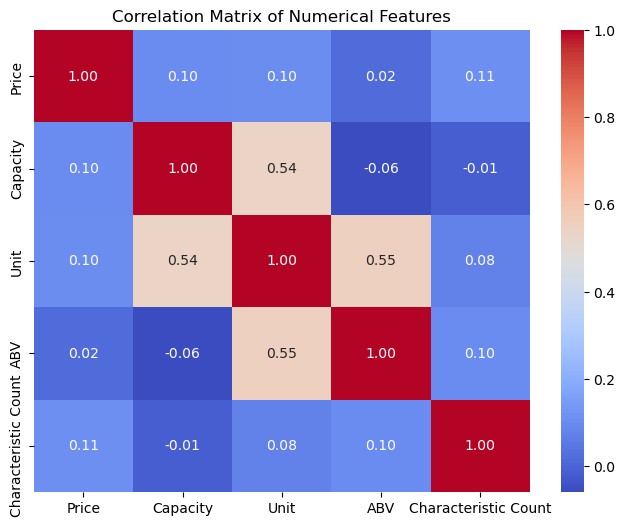

In [38]:
# Calculate the correlation matrix
selected_columns = ['Price', 'Capacity', 'Unit', 'ABV', 'Characteristic Count']
correlation_matrix = wine_clean[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

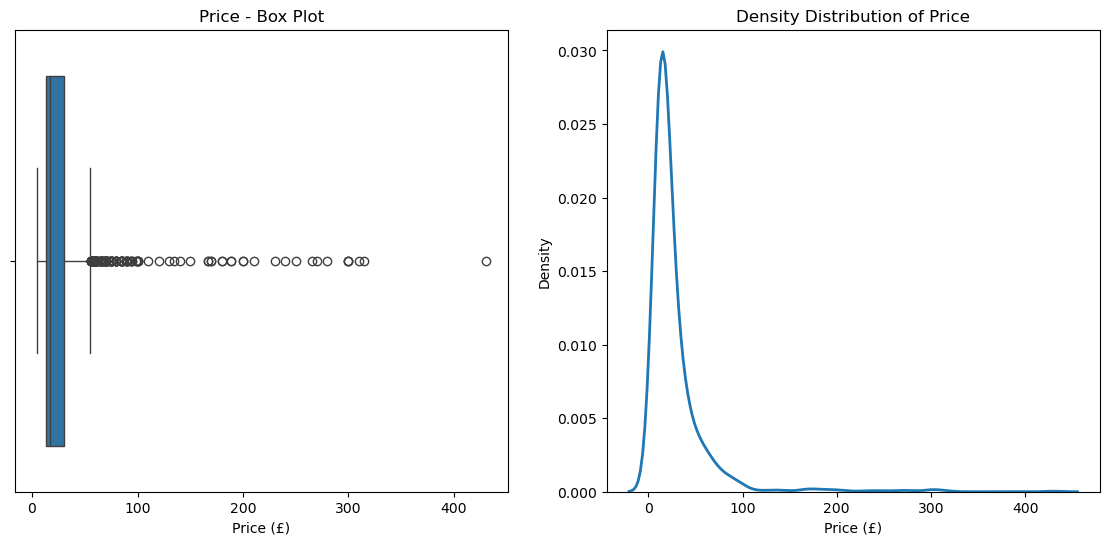

<Figure size 640x480 with 0 Axes>

In [39]:
# Plotting Box Plot and Density Distribution for Price
plt.figure(figsize=(14, 6))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(data=wine_clean, x='Price')
plt.title('Price - Box Plot')
plt.xlabel('Price (£)')

# Density Distribution Plot
plt.subplot(1, 2, 2)
sns.kdeplot(wine_clean['Price'], linewidth=2)
plt.title('Density Distribution of Price')
plt.xlabel('Price (£)')
plt.ylabel('Density')
plt.show()

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9556\1752959175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=type_counts.index, y=type_counts, palette=sns.color_palette("Paired", len(type_counts)))


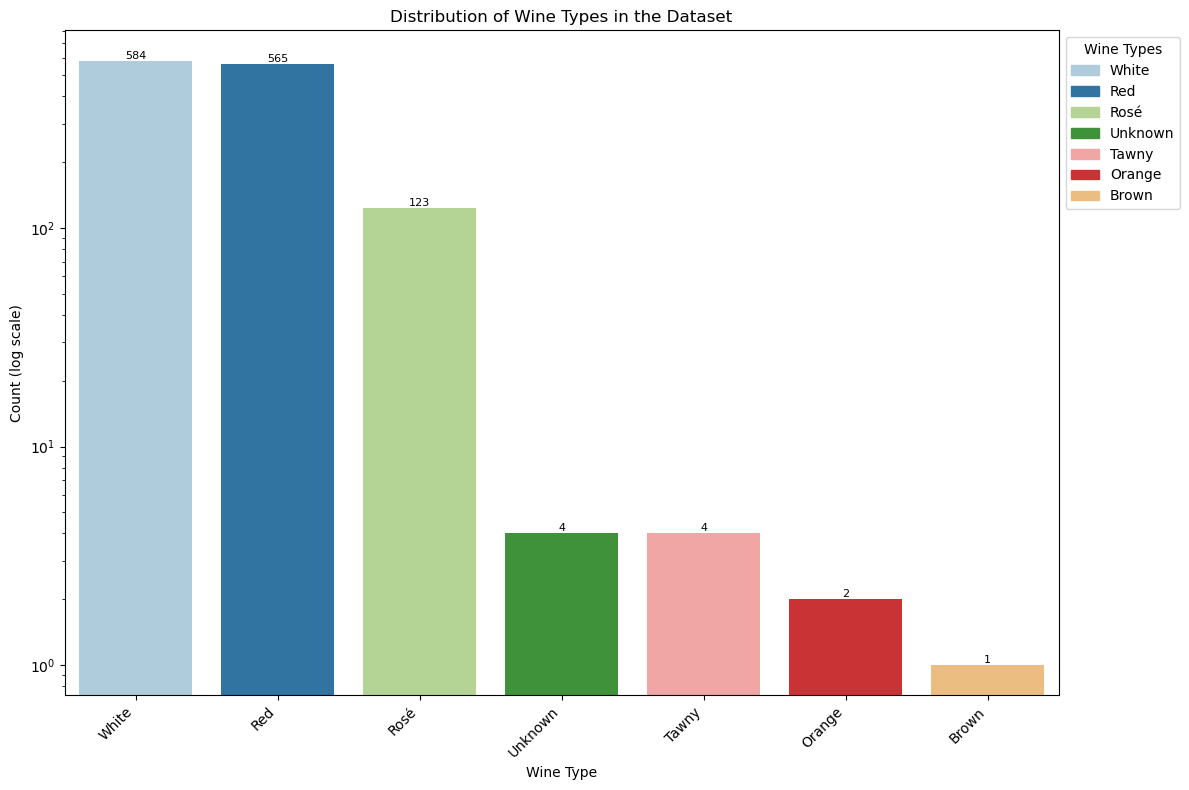

In [40]:
# Count the number of wines for each type
type_counts = wine_clean['Type'].value_counts()

# Create the bar chart with log scale and value labels
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=type_counts.index, y=type_counts, palette=sns.color_palette("Paired", len(type_counts)))
plt.title('Distribution of Wine Types in the Dataset')
plt.xlabel('Wine Type')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')

# Add count values on top of bars
for i, count in enumerate(type_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=8)

# Create a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=ax.patches[i].get_facecolor()) for i in range(len(type_counts))]
plt.legend(handles, type_counts.index, title='Wine Types', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

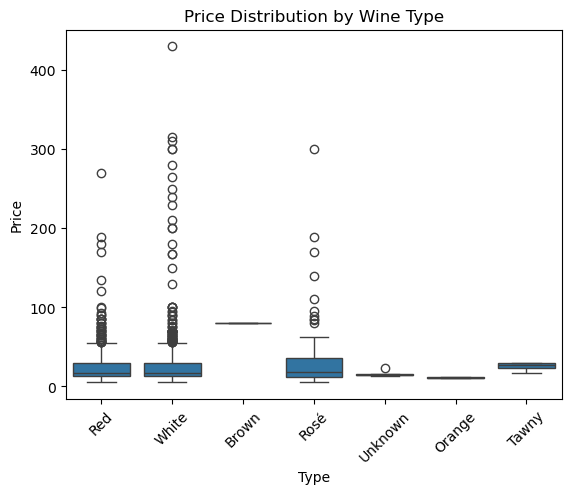

In [41]:
# Boxplot for Price by Region
sns.boxplot(x='Type', y='Price', data=wine_clean)
plt.title('Price Distribution by Wine Type')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Count the frequency of each characteristic
characteristics_split = wine_clean['Characteristics'].dropna().str.split(',').explode().str.strip()
characteristic_counts = characteristics_split.value_counts()

# Adjust display options to show all rows
pd.set_option('display.max_rows', None)

# Print all characteristic counts
print(characteristic_counts)

# Reset the display option back to default after viewing
pd.reset_option('display.max_rows')

Vanilla              259
Peach                245
Green Apple          244
Citrus Fruit         239
Red Fruit            205
Lemon                202
Raspberry            190
Spice                179
Strawberry           170
Black Plum           165
Blackberry           160
Black Fruit          150
Blackcurrant         144
Floral               132
Black Cherry         124
Red Cherry           122
Stone Fruit          100
Apricot               89
Bread                 84
Pear                  80
Sweet Spice           79
Earth                 79
Grass                 78
Cream                 77
Honey                 73
Tropical Fruit        69
Chocolate             65
Cedar                 63
Violet                53
Smoke                 52
Black Pepper          50
Tobacco               46
Butter                45
Grapefruit            45
Lime                  44
Almond                44
Wet Stones            44
Blueberry             43
Herbaceous            42
Biscuit               41


C:\Users\Admin\AppData\Local\Temp\ipykernel_9556\3960486568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_clean[char] = wine_clean['Characteristics'].fillna('').apply(lambda x: 1 if char in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9556\3960486568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_clean[char] = wine_clean['Characteristics'].fillna('').apply(lambda x: 1 if char in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9556\3960486568.py:6: SettingWithCopyWarning: 

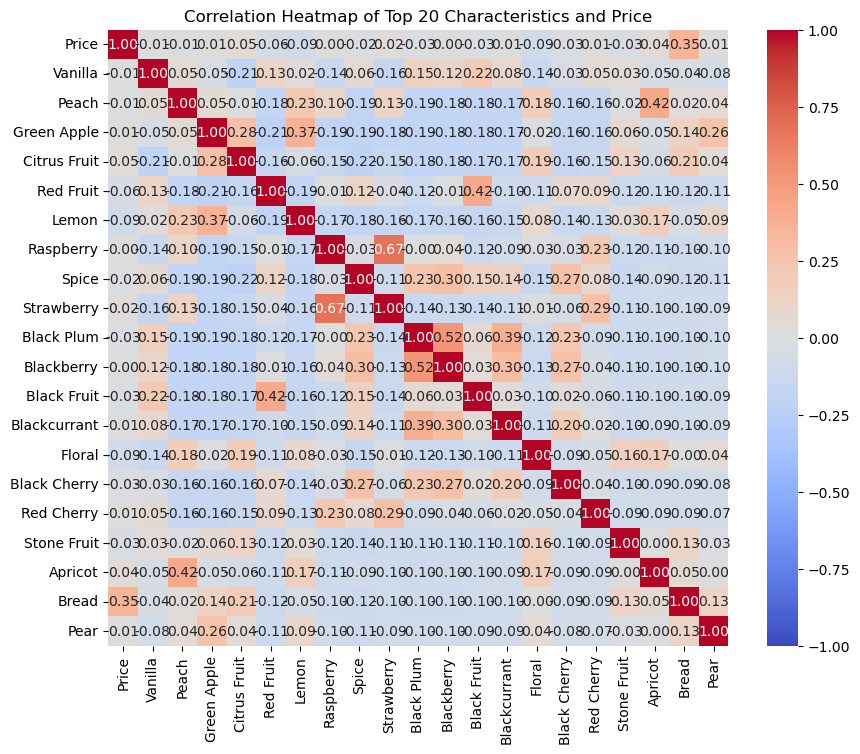

In [43]:
# Select the top 20 most frequent characteristics
top_20_characteristics = characteristic_counts.head(20).index

# One-Hot Encode the top 20 characteristics
for char in top_20_characteristics:
    wine_clean[char] = wine_clean['Characteristics'].fillna('').apply(lambda x: 1 if char in x else 0)

# Create a correlation matrix for top 20 characteristics and Price
correlation_matrix = wine_clean[['Price'] + top_20_characteristics.tolist()].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Top 20 Characteristics and Price")
plt.show()

In [47]:
wine_clean

,Title,Price,Capacity,Grape,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,...,Blackberry,Black Fruit,Blackcurrant,Floral,Black Cherry,Red Cherry,Stone Fruit,Apricot,Bread,Pear
0,"The Guv'nor, Spain",9.99,750.0,Tempranillo,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,...,1,0,1,0,0,0,0,0,0,0
1,Bread & Butter 'Winemaker's Selection' Chardon...,15.99,750.0,Chardonnay,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,...,0,0,0,0,0,0,1,0,0,0
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",12.49,750.0,Sauvignon Blanc,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,...,0,0,0,0,0,0,1,0,0,0
3,Louis Latour Mâcon-Lugny 2021/22,17.99,750.0,Chardonnay,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,...,0,0,0,1,0,0,0,1,0,0
4,Bread & Butter 'Winemaker's Selection' Pinot N...,15.99,750.0,Pinot Noir,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",11.99,750.0,Chenin Blanc,Natural Cork,France,9.4,"Quince, Green Apple, Lemon, Pear",per bottle,White,...,0,0,0,0,0,0,0,0,0,1
1286,"Waimea Estates Pinot Noir Rosé 2021, Nelson",13.99,750.0,Pinot Noir,Screwcap,New Zealand,9.8,"Floral, Raspberry, Red Cherry, Strawberry",per bottle,Rosé,...,0,0,0,1,0,1,0,0,0,0
1287,Wakefield 'Visionary' Cabernet Sauvignon 2010,85.00,750.0,Cabernet Sauvignon,Screwcap,Australia,10.1,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",per bottle,Red,...,1,0,1,0,0,0,0,0,0,0
1288,Yalumba 'The Menzies' Cabernet Sauvignon 2015/...,37.99,750.0,Cabernet Sauvignon,Natural Cork,Australia,10.9,"Black Plum, Blackcurrant, Vanilla",per bottle,Red,...,0,0,1,0,0,0,0,0,0,0


In [44]:
# Count the number of wines per country
country_counts = wine_clean['Country'].value_counts()
country_counts

France            502
Italy             147
Spain             113
Australia          96
New Zealand        91
South Africa       77
USA                51
Chile              46
Portugal           44
Argentina          40
England            29
Austria            10
Germany            10
Greece              7
Hungary             4
Moldova             3
Romania             3
Lebanon             2
Georgia             2
Scotland            1
Serbia              1
Slovenia            1
Mexico              1
United Kingdom      1
Bulgaria            1
Name: Country, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_9556\940780320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


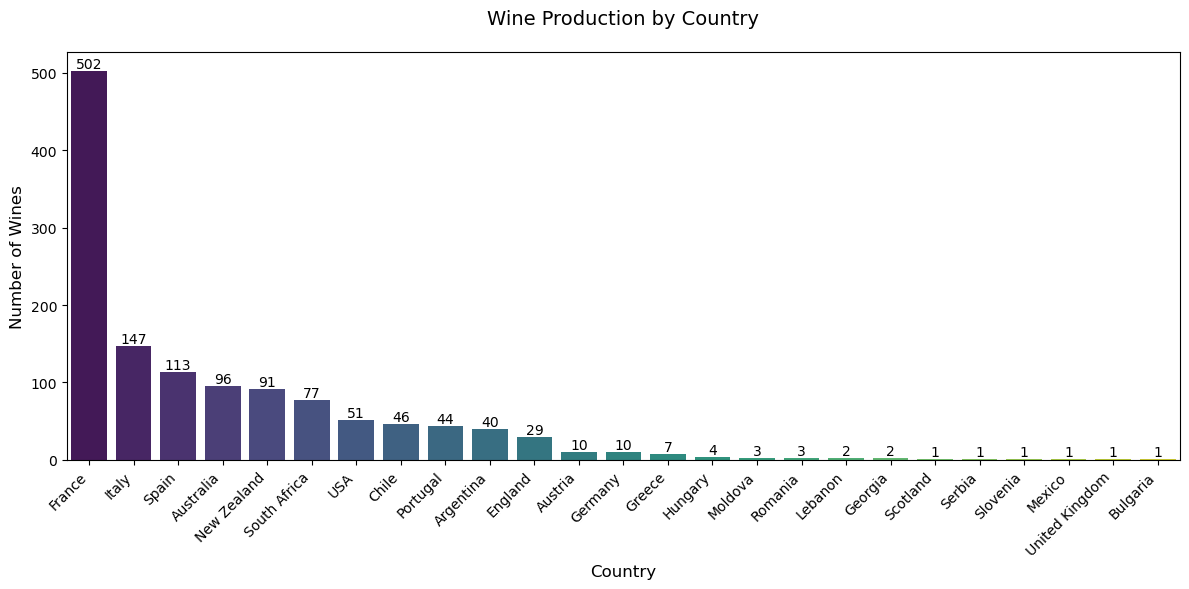

In [45]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Customize the plot
plt.title('Wine Production by Country', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Wines', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(country_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()